 Sentiment Predictor for Stress Detection no emoUERJ

In [ ]:
!pip install librosa tensorflow

In [ ]:
!pip install resampy librosa audioread soundfile

In [ ]:
!pip3 install resampy

In [ ]:
!gdown 16MMIiaSZeozAFI7MEBU-eHY0-h7kTXpW

Downloading...
From (original): https://drive.google.com/uc?id=16MMIiaSZeozAFI7MEBU-eHY0-h7kTXpW
From (redirected): https://drive.google.com/uc?id=16MMIiaSZeozAFI7MEBU-eHY0-h7kTXpW&confirm=t&uuid=d450c1ba-ea3f-4e70-a0d4-ab01094ae169
To: /content/emoUERJ.zip
100% 105M/105M [00:02<00:00, 35.1MB/s]


In [ ]:
import os
import numpy as np
import pandas as pd
import librosa
import tensorflow as tf
from tensorflow.keras.models import load_model, model_from_json
import matplotlib.pyplot as plt
import resampy
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import zipfile
from tqdm import tqdm

In [ ]:
# Extrair o dataset EMOUERJ
zip_path = 'emoUERJ.zip'
extract_to = 'emoUERJ'

if not os.path.exists(extract_to):
    os.makedirs(extract_to)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

audio_dir = os.path.join(extract_to, 'emoUERJ')
data = []
emotion_mapping = {'h': 'happy', 'a': 'angry', 's': 'sad', 'n': 'neutral'}

for filename in os.listdir(audio_dir):
    if filename.endswith(".wav"):
        label_key = filename[3]
        emotion = emotion_mapping.get(label_key, None)
        if emotion:
            data.append({'filename': os.path.join(audio_dir, filename), 'emotion': emotion})

df_emoUERJ = pd.DataFrame(data)
print(df_emoUERJ['emotion'].value_counts())

emotion
sad        100
angry       94
neutral     92
happy       91
Name: count, dtype: int64


In [ ]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("/content/Data_noiseNshift.h5")
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model_classes = ['male_angry', 'male_calm', 'male_fearful', 'male_happy', 'male_sad']
emouerj_to_model = {
    'angry': 'male_angry',
    'happy': 'male_happy',
    'sad': 'male_sad',
    'neutral': 'male_calm'
}

In [ ]:
def extract_feature(file_name):
    X, sample_rate = librosa.load(file_name, res_type='kaiser_fast', duration=2.97, sr=22050)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)

    if len(mfccs) < 259:
        mfccs = np.pad(mfccs, (0, 259 - len(mfccs)))
    elif len(mfccs) > 259:
        mfccs = mfccs[:259]

    return mfccs

In [ ]:
def infer_and_collect_results(df, audio_col, true_label_col):
    y_true = []
    y_pred = []
    for _, row in tqdm(df.iterrows(), total=df.shape[0]):
        audio_path = row[audio_col]
        true_emotion = emouerj_to_model[row[true_label_col]]

        features = extract_feature(audio_path)
        features = np.expand_dims(features, axis=0)
        features = np.expand_dims(features, axis=2)

        prediction = loaded_model.predict(features)
        predicted_emotion = model_classes[np.argmax(prediction)]

        y_true.append(true_emotion)
        y_pred.append(predicted_emotion)

    return y_true, y_pred

In [ ]:
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

  0%|          | 0/377 [00:00<?, ?it/s]

1/1 [==============================] - 0s 198ms/step


  0%|          | 1/377 [00:00<01:53,  3.32it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 2/377 [00:00<01:15,  4.98it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 3/377 [00:00<01:05,  5.68it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 4/377 [00:00<01:00,  6.17it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▏         | 5/377 [00:00<00:56,  6.53it/s]

1/1 [==============================] - 0s 29ms/step


  2%|▏         | 6/377 [00:01<00:56,  6.60it/s]

1/1 [==============================] - 0s 27ms/step


  2%|▏         | 7/377 [00:01<00:54,  6.79it/s]

1/1 [==============================] - 0s 68ms/step


  2%|▏         | 8/377 [00:01<01:02,  5.87it/s]

1/1 [==============================] - 0s 27ms/step


  2%|▏         | 9/377 [00:01<01:12,  5.06it/s]

1/1 [==============================] - 0s 51ms/step


  3%|▎         | 10/377 [00:01<01:10,  5.20it/s]

1/1 [==============================] - 0s 30ms/step


  3%|▎         | 11/377 [00:02<01:12,  5.07it/s]

1/1 [==============================] - 0s 63ms/step


  3%|▎         | 12/377 [00:02<01:12,  5.03it/s]

1/1 [==============================] - 0s 41ms/step


  3%|▎         | 13/377 [00:02<01:16,  4.76it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▎         | 14/377 [00:02<01:15,  4.79it/s]

1/1 [==============================] - 0s 42ms/step


  4%|▍         | 15/377 [00:02<01:17,  4.64it/s]

1/1 [==============================] - 0s 46ms/step


  4%|▍         | 16/377 [00:03<01:19,  4.55it/s]

1/1 [==============================] - 0s 51ms/step


  5%|▍         | 17/377 [00:03<01:22,  4.35it/s]

1/1 [==============================] - 0s 31ms/step


  5%|▍         | 18/377 [00:03<01:17,  4.64it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▌         | 19/377 [00:03<01:20,  4.42it/s]

1/1 [==============================] - 0s 27ms/step


  5%|▌         | 20/377 [00:03<01:10,  5.08it/s]

1/1 [==============================] - 0s 30ms/step


  6%|▌         | 21/377 [00:04<01:04,  5.55it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 22/377 [00:04<01:00,  5.88it/s]

1/1 [==============================] - 0s 57ms/step


  6%|▌         | 23/377 [00:04<01:01,  5.73it/s]

1/1 [==============================] - 0s 29ms/step


  6%|▋         | 24/377 [00:04<00:57,  6.11it/s]

1/1 [==============================] - 0s 27ms/step


  7%|▋         | 25/377 [00:04<00:56,  6.21it/s]

1/1 [==============================] - 0s 28ms/step


  7%|▋         | 26/377 [00:04<00:54,  6.44it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 27/377 [00:04<00:54,  6.47it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 28/377 [00:05<00:51,  6.81it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 29/377 [00:05<00:51,  6.69it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 30/377 [00:05<00:52,  6.64it/s]

1/1 [==============================] - 0s 26ms/step


  8%|▊         | 31/377 [00:05<00:50,  6.91it/s]

1/1 [==============================] - 0s 29ms/step


  8%|▊         | 32/377 [00:05<00:50,  6.82it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▉         | 33/377 [00:05<00:50,  6.75it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▉         | 34/377 [00:05<00:48,  7.01it/s]

1/1 [==============================] - 0s 25ms/step


  9%|▉         | 35/377 [00:06<00:47,  7.13it/s]

1/1 [==============================] - 0s 27ms/step


 10%|▉         | 36/377 [00:06<00:50,  6.78it/s]

1/1 [==============================] - 0s 26ms/step


 10%|▉         | 37/377 [00:06<00:50,  6.73it/s]

1/1 [==============================] - 0s 28ms/step


 10%|█         | 38/377 [00:06<00:50,  6.73it/s]

1/1 [==============================] - 0s 34ms/step


 10%|█         | 39/377 [00:06<00:49,  6.80it/s]

1/1 [==============================] - 0s 27ms/step


 11%|█         | 40/377 [00:06<00:47,  7.06it/s]

1/1 [==============================] - 0s 37ms/step


 11%|█         | 41/377 [00:07<00:48,  6.93it/s]

1/1 [==============================] - 0s 29ms/step


 11%|█         | 42/377 [00:07<00:46,  7.19it/s]

1/1 [==============================] - 0s 52ms/step


 11%|█▏        | 43/377 [00:07<00:49,  6.78it/s]

1/1 [==============================] - 0s 32ms/step


 12%|█▏        | 44/377 [00:07<00:50,  6.61it/s]

1/1 [==============================] - 0s 27ms/step


 12%|█▏        | 45/377 [00:07<00:49,  6.67it/s]

1/1 [==============================] - 0s 29ms/step


 12%|█▏        | 46/377 [00:07<00:48,  6.83it/s]

1/1 [==============================] - 0s 30ms/step


 12%|█▏        | 47/377 [00:07<00:48,  6.86it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 48/377 [00:08<00:48,  6.77it/s]

1/1 [==============================] - 0s 31ms/step


 13%|█▎        | 49/377 [00:08<00:46,  7.01it/s]

1/1 [==============================] - 0s 45ms/step


 13%|█▎        | 50/377 [00:08<00:51,  6.36it/s]

1/1 [==============================] - 0s 30ms/step


 14%|█▎        | 51/377 [00:08<00:50,  6.48it/s]

1/1 [==============================] - 0s 28ms/step


 14%|█▍        | 52/377 [00:08<00:49,  6.62it/s]

1/1 [==============================] - 0s 27ms/step


 14%|█▍        | 53/377 [00:08<00:48,  6.72it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▍        | 54/377 [00:08<00:48,  6.66it/s]

1/1 [==============================] - 0s 28ms/step


 15%|█▍        | 55/377 [00:09<00:48,  6.66it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▍        | 56/377 [00:09<00:47,  6.73it/s]

1/1 [==============================] - 0s 37ms/step


 15%|█▌        | 57/377 [00:09<00:51,  6.23it/s]

1/1 [==============================] - 0s 30ms/step


 15%|█▌        | 58/377 [00:09<00:49,  6.50it/s]

1/1 [==============================] - 0s 26ms/step


 16%|█▌        | 59/377 [00:09<00:47,  6.64it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▌        | 60/377 [00:09<00:47,  6.74it/s]

1/1 [==============================] - 0s 29ms/step


 16%|█▌        | 61/377 [00:10<00:45,  6.94it/s]

1/1 [==============================] - 0s 27ms/step


 16%|█▋        | 62/377 [00:10<00:45,  6.90it/s]

1/1 [==============================] - 0s 27ms/step


 17%|█▋        | 63/377 [00:10<00:45,  6.87it/s]

1/1 [==============================] - 0s 27ms/step


 17%|█▋        | 64/377 [00:10<00:46,  6.71it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 65/377 [00:10<00:45,  6.86it/s]

1/1 [==============================] - 0s 36ms/step


 18%|█▊        | 66/377 [00:10<00:45,  6.79it/s]

1/1 [==============================] - 0s 29ms/step


 18%|█▊        | 67/377 [00:10<00:43,  7.13it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 68/377 [00:11<00:43,  7.08it/s]

1/1 [==============================] - 0s 32ms/step


 18%|█▊        | 69/377 [00:11<00:44,  6.99it/s]

1/1 [==============================] - 0s 29ms/step


 19%|█▊        | 70/377 [00:11<00:42,  7.22it/s]

1/1 [==============================] - 0s 28ms/step


 19%|█▉        | 71/377 [00:11<00:47,  6.40it/s]

1/1 [==============================] - 0s 26ms/step


 19%|█▉        | 72/377 [00:11<00:45,  6.69it/s]

1/1 [==============================] - 0s 29ms/step


 19%|█▉        | 73/377 [00:11<00:45,  6.74it/s]

1/1 [==============================] - 0s 31ms/step


 20%|█▉        | 74/377 [00:11<00:44,  6.76it/s]

1/1 [==============================] - 0s 26ms/step


 20%|█▉        | 75/377 [00:12<00:44,  6.86it/s]

1/1 [==============================] - 0s 27ms/step


 20%|██        | 76/377 [00:12<00:42,  7.13it/s]

1/1 [==============================] - 0s 34ms/step


 20%|██        | 77/377 [00:12<00:42,  6.98it/s]

1/1 [==============================] - 0s 37ms/step


 21%|██        | 78/377 [00:12<00:45,  6.59it/s]

1/1 [==============================] - 0s 31ms/step


 21%|██        | 79/377 [00:12<00:44,  6.76it/s]

1/1 [==============================] - 0s 33ms/step


 21%|██        | 80/377 [00:12<00:44,  6.66it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██▏       | 81/377 [00:12<00:44,  6.68it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██▏       | 82/377 [00:13<00:43,  6.85it/s]

1/1 [==============================] - 0s 26ms/step


 22%|██▏       | 83/377 [00:13<00:43,  6.79it/s]

1/1 [==============================] - 0s 33ms/step


 22%|██▏       | 84/377 [00:13<00:42,  6.95it/s]

1/1 [==============================] - 0s 37ms/step


 23%|██▎       | 85/377 [00:13<00:44,  6.61it/s]

1/1 [==============================] - 0s 29ms/step


 23%|██▎       | 86/377 [00:13<00:42,  6.82it/s]

1/1 [==============================] - 0s 26ms/step


 23%|██▎       | 87/377 [00:13<00:41,  6.97it/s]

1/1 [==============================] - 0s 39ms/step


 23%|██▎       | 88/377 [00:14<00:46,  6.26it/s]

1/1 [==============================] - 0s 43ms/step


 24%|██▎       | 89/377 [00:14<00:50,  5.68it/s]

1/1 [==============================] - 0s 65ms/step


 24%|██▍       | 90/377 [00:14<00:52,  5.44it/s]

1/1 [==============================] - 0s 45ms/step


 24%|██▍       | 91/377 [00:14<00:56,  5.04it/s]

1/1 [==============================] - 0s 29ms/step


 24%|██▍       | 92/377 [00:14<00:52,  5.45it/s]

1/1 [==============================] - 0s 28ms/step


 25%|██▍       | 93/377 [00:14<00:49,  5.71it/s]

1/1 [==============================] - 0s 52ms/step


 25%|██▍       | 94/377 [00:15<00:50,  5.62it/s]

1/1 [==============================] - 0s 62ms/step


 25%|██▌       | 95/377 [00:15<00:56,  5.01it/s]

1/1 [==============================] - 0s 64ms/step


 25%|██▌       | 96/377 [00:15<00:58,  4.80it/s]

1/1 [==============================] - 0s 40ms/step


 26%|██▌       | 97/377 [00:15<00:58,  4.77it/s]

1/1 [==============================] - 0s 43ms/step


 26%|██▌       | 98/377 [00:16<00:59,  4.69it/s]

1/1 [==============================] - 0s 45ms/step


 26%|██▋       | 99/377 [00:16<00:59,  4.68it/s]

1/1 [==============================] - 0s 58ms/step


 27%|██▋       | 100/377 [00:16<00:59,  4.69it/s]

1/1 [==============================] - 0s 36ms/step


 27%|██▋       | 101/377 [00:16<01:00,  4.56it/s]

1/1 [==============================] - 0s 42ms/step


 27%|██▋       | 102/377 [00:16<01:00,  4.53it/s]

1/1 [==============================] - 0s 26ms/step


 27%|██▋       | 103/377 [00:17<00:53,  5.14it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 104/377 [00:17<00:48,  5.65it/s]

1/1 [==============================] - 0s 40ms/step


 28%|██▊       | 105/377 [00:17<00:46,  5.84it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 106/377 [00:17<00:45,  5.99it/s]

1/1 [==============================] - 0s 41ms/step


 28%|██▊       | 107/377 [00:17<00:44,  6.11it/s]

1/1 [==============================] - 0s 31ms/step


 29%|██▊       | 108/377 [00:17<00:43,  6.20it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▉       | 109/377 [00:17<00:41,  6.50it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▉       | 110/377 [00:18<00:40,  6.59it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▉       | 111/377 [00:18<00:39,  6.81it/s]

1/1 [==============================] - 0s 31ms/step


 30%|██▉       | 112/377 [00:18<00:40,  6.59it/s]

1/1 [==============================] - 0s 26ms/step


 30%|██▉       | 113/377 [00:18<00:38,  6.94it/s]

1/1 [==============================] - 0s 46ms/step


 30%|███       | 114/377 [00:18<00:39,  6.59it/s]

1/1 [==============================] - 0s 31ms/step


 31%|███       | 115/377 [00:18<00:38,  6.81it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███       | 116/377 [00:18<00:38,  6.86it/s]

1/1 [==============================] - 0s 38ms/step


 31%|███       | 117/377 [00:19<00:41,  6.31it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███▏      | 118/377 [00:19<00:38,  6.72it/s]

1/1 [==============================] - 0s 27ms/step


 32%|███▏      | 119/377 [00:19<00:38,  6.70it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 120/377 [00:19<00:37,  6.79it/s]

1/1 [==============================] - 0s 43ms/step


 32%|███▏      | 121/377 [00:19<00:38,  6.73it/s]

1/1 [==============================] - 0s 27ms/step


 32%|███▏      | 122/377 [00:19<00:37,  6.75it/s]

1/1 [==============================] - 0s 27ms/step


 33%|███▎      | 123/377 [00:20<00:35,  7.08it/s]

1/1 [==============================] - 0s 28ms/step


 33%|███▎      | 124/377 [00:20<00:36,  6.99it/s]

1/1 [==============================] - 0s 29ms/step


 33%|███▎      | 125/377 [00:20<00:35,  7.09it/s]

1/1 [==============================] - 0s 30ms/step


 33%|███▎      | 126/377 [00:20<00:36,  6.90it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▎      | 127/377 [00:20<00:35,  6.97it/s]

1/1 [==============================] - 0s 28ms/step


 34%|███▍      | 128/377 [00:20<00:35,  6.97it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▍      | 129/377 [00:20<00:35,  6.96it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▍      | 130/377 [00:21<00:34,  7.15it/s]

1/1 [==============================] - 0s 28ms/step


 35%|███▍      | 131/377 [00:21<00:34,  7.14it/s]

1/1 [==============================] - 0s 31ms/step


 35%|███▌      | 132/377 [00:21<00:35,  6.84it/s]

1/1 [==============================] - 0s 28ms/step


 35%|███▌      | 133/377 [00:21<00:35,  6.78it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███▌      | 134/377 [00:21<00:35,  6.77it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▌      | 135/377 [00:21<00:36,  6.66it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███▌      | 136/377 [00:21<00:35,  6.77it/s]

1/1 [==============================] - 0s 30ms/step


 36%|███▋      | 137/377 [00:22<00:35,  6.79it/s]

1/1 [==============================] - 0s 30ms/step


 37%|███▋      | 138/377 [00:22<00:35,  6.83it/s]

1/1 [==============================] - 0s 28ms/step


 37%|███▋      | 139/377 [00:22<00:33,  7.08it/s]

1/1 [==============================] - 0s 25ms/step


 37%|███▋      | 140/377 [00:22<00:34,  6.94it/s]

1/1 [==============================] - 0s 32ms/step


 37%|███▋      | 141/377 [00:22<00:34,  6.87it/s]

1/1 [==============================] - 0s 26ms/step


 38%|███▊      | 142/377 [00:22<00:34,  6.89it/s]

1/1 [==============================] - 0s 26ms/step


 38%|███▊      | 143/377 [00:22<00:34,  6.83it/s]

1/1 [==============================] - 0s 27ms/step


 38%|███▊      | 144/377 [00:23<00:35,  6.62it/s]

1/1 [==============================] - 0s 25ms/step


 38%|███▊      | 145/377 [00:23<00:34,  6.63it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███▊      | 146/377 [00:23<00:35,  6.54it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▉      | 147/377 [00:23<00:34,  6.67it/s]

1/1 [==============================] - 0s 27ms/step


 39%|███▉      | 148/377 [00:23<00:34,  6.73it/s]

1/1 [==============================] - 0s 27ms/step


 40%|███▉      | 149/377 [00:23<00:33,  6.73it/s]

1/1 [==============================] - 0s 27ms/step


 40%|███▉      | 150/377 [00:23<00:33,  6.77it/s]

1/1 [==============================] - 0s 25ms/step


 40%|████      | 151/377 [00:24<00:32,  7.04it/s]

1/1 [==============================] - 0s 26ms/step


 40%|████      | 152/377 [00:24<00:32,  6.96it/s]

1/1 [==============================] - 0s 28ms/step


 41%|████      | 153/377 [00:24<00:33,  6.73it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████      | 154/377 [00:24<00:32,  6.96it/s]

1/1 [==============================] - 0s 27ms/step


 41%|████      | 155/377 [00:24<00:32,  6.86it/s]

1/1 [==============================] - 0s 37ms/step


 41%|████▏     | 156/377 [00:24<00:32,  6.72it/s]

1/1 [==============================] - 0s 26ms/step


 42%|████▏     | 157/377 [00:24<00:31,  6.88it/s]

1/1 [==============================] - 0s 25ms/step


 42%|████▏     | 158/377 [00:25<00:31,  6.94it/s]

1/1 [==============================] - 0s 26ms/step


 42%|████▏     | 159/377 [00:25<00:31,  6.92it/s]

1/1 [==============================] - 0s 43ms/step


 42%|████▏     | 160/377 [00:25<00:32,  6.75it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████▎     | 161/377 [00:25<00:31,  6.90it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████▎     | 162/377 [00:25<00:31,  6.77it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████▎     | 163/377 [00:25<00:31,  6.77it/s]

1/1 [==============================] - 0s 33ms/step


 44%|████▎     | 164/377 [00:26<00:32,  6.63it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▍     | 165/377 [00:26<00:31,  6.75it/s]

1/1 [==============================] - 0s 31ms/step


 44%|████▍     | 166/377 [00:26<00:31,  6.75it/s]

1/1 [==============================] - 0s 31ms/step


 44%|████▍     | 167/377 [00:26<00:30,  6.93it/s]

1/1 [==============================] - 0s 31ms/step


 45%|████▍     | 168/377 [00:26<00:30,  6.86it/s]

1/1 [==============================] - 0s 32ms/step


 45%|████▍     | 169/377 [00:26<00:29,  7.11it/s]

1/1 [==============================] - 0s 32ms/step


 45%|████▌     | 170/377 [00:26<00:29,  6.97it/s]

1/1 [==============================] - 0s 37ms/step


 45%|████▌     | 171/377 [00:27<00:34,  5.96it/s]

1/1 [==============================] - 0s 39ms/step


 46%|████▌     | 172/377 [00:27<00:34,  5.97it/s]

1/1 [==============================] - 0s 39ms/step


 46%|████▌     | 173/377 [00:27<00:38,  5.32it/s]

1/1 [==============================] - 0s 28ms/step


 46%|████▌     | 174/377 [00:27<00:36,  5.60it/s]

1/1 [==============================] - 0s 29ms/step


 46%|████▋     | 175/377 [00:27<00:34,  5.81it/s]

1/1 [==============================] - 0s 79ms/step


 47%|████▋     | 176/377 [00:28<00:36,  5.46it/s]

1/1 [==============================] - 0s 50ms/step


 47%|████▋     | 177/377 [00:28<00:39,  5.11it/s]

1/1 [==============================] - 0s 45ms/step


 47%|████▋     | 178/377 [00:28<00:39,  5.08it/s]

1/1 [==============================] - 0s 46ms/step


 47%|████▋     | 179/377 [00:28<00:38,  5.21it/s]

1/1 [==============================] - 0s 30ms/step


 48%|████▊     | 180/377 [00:28<00:40,  4.88it/s]

1/1 [==============================] - 0s 52ms/step


 48%|████▊     | 181/377 [00:29<00:39,  4.93it/s]

1/1 [==============================] - 0s 44ms/step


 48%|████▊     | 182/377 [00:29<00:39,  4.92it/s]

1/1 [==============================] - 0s 66ms/step


 49%|████▊     | 183/377 [00:29<00:40,  4.78it/s]

1/1 [==============================] - 0s 48ms/step


 49%|████▉     | 184/377 [00:29<00:41,  4.66it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████▉     | 185/377 [00:29<00:39,  4.87it/s]

1/1 [==============================] - 0s 32ms/step


 49%|████▉     | 186/377 [00:30<00:35,  5.36it/s]

1/1 [==============================] - 0s 25ms/step


 50%|████▉     | 187/377 [00:30<00:33,  5.72it/s]

1/1 [==============================] - 0s 33ms/step


 50%|████▉     | 188/377 [00:30<00:32,  5.86it/s]

1/1 [==============================] - 0s 30ms/step


 50%|█████     | 189/377 [00:30<00:30,  6.08it/s]

1/1 [==============================] - 0s 26ms/step


 50%|█████     | 190/377 [00:30<00:29,  6.34it/s]

1/1 [==============================] - 0s 25ms/step


 51%|█████     | 191/377 [00:30<00:28,  6.53it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████     | 192/377 [00:30<00:27,  6.69it/s]

1/1 [==============================] - 0s 25ms/step


 51%|█████     | 193/377 [00:31<00:27,  6.73it/s]

1/1 [==============================] - 0s 25ms/step


 51%|█████▏    | 194/377 [00:31<00:27,  6.67it/s]

1/1 [==============================] - 0s 29ms/step


 52%|█████▏    | 195/377 [00:31<00:27,  6.69it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 196/377 [00:31<00:27,  6.53it/s]

1/1 [==============================] - 0s 30ms/step


 52%|█████▏    | 197/377 [00:31<00:26,  6.87it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 198/377 [00:31<00:26,  6.71it/s]

1/1 [==============================] - 0s 26ms/step


 53%|█████▎    | 199/377 [00:31<00:26,  6.77it/s]

1/1 [==============================] - 0s 27ms/step


 53%|█████▎    | 200/377 [00:32<00:26,  6.74it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 201/377 [00:32<00:26,  6.76it/s]

1/1 [==============================] - 0s 31ms/step


 54%|█████▎    | 202/377 [00:32<00:26,  6.55it/s]

1/1 [==============================] - 0s 31ms/step


 54%|█████▍    | 203/377 [00:32<00:26,  6.65it/s]

1/1 [==============================] - 0s 30ms/step


 54%|█████▍    | 204/377 [00:32<00:24,  6.93it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▍    | 205/377 [00:32<00:25,  6.83it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▍    | 206/377 [00:33<00:24,  6.87it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▍    | 207/377 [00:33<00:24,  6.99it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████▌    | 208/377 [00:33<00:24,  6.83it/s]

1/1 [==============================] - 0s 29ms/step


 55%|█████▌    | 209/377 [00:33<00:25,  6.64it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████▌    | 210/377 [00:33<00:24,  6.77it/s]

1/1 [==============================] - 0s 32ms/step


 56%|█████▌    | 211/377 [00:33<00:24,  6.65it/s]

1/1 [==============================] - 0s 30ms/step


 56%|█████▌    | 212/377 [00:33<00:24,  6.65it/s]

1/1 [==============================] - 0s 26ms/step


 56%|█████▋    | 213/377 [00:34<00:25,  6.54it/s]

1/1 [==============================] - 0s 25ms/step


 57%|█████▋    | 214/377 [00:34<00:23,  6.90it/s]

1/1 [==============================] - 0s 33ms/step


 57%|█████▋    | 215/377 [00:34<00:24,  6.70it/s]

1/1 [==============================] - 0s 35ms/step


 57%|█████▋    | 216/377 [00:34<00:24,  6.53it/s]

1/1 [==============================] - 0s 26ms/step


 58%|█████▊    | 217/377 [00:34<00:23,  6.72it/s]

1/1 [==============================] - 0s 25ms/step


 58%|█████▊    | 218/377 [00:34<00:22,  6.92it/s]

1/1 [==============================] - 0s 26ms/step


 58%|█████▊    | 219/377 [00:34<00:22,  7.05it/s]

1/1 [==============================] - 0s 27ms/step


 58%|█████▊    | 220/377 [00:35<00:22,  6.93it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████▊    | 221/377 [00:35<00:22,  6.79it/s]

1/1 [==============================] - 0s 33ms/step


 59%|█████▉    | 222/377 [00:35<00:23,  6.69it/s]

1/1 [==============================] - 0s 26ms/step


 59%|█████▉    | 223/377 [00:35<00:22,  6.73it/s]

1/1 [==============================] - 0s 31ms/step


 59%|█████▉    | 224/377 [00:35<00:21,  6.97it/s]

1/1 [==============================] - 0s 27ms/step


 60%|█████▉    | 225/377 [00:35<00:21,  6.95it/s]

1/1 [==============================] - 0s 32ms/step


 60%|█████▉    | 226/377 [00:35<00:21,  6.94it/s]

1/1 [==============================] - 0s 25ms/step


 60%|██████    | 227/377 [00:36<00:21,  6.98it/s]

1/1 [==============================] - 0s 26ms/step


 60%|██████    | 228/377 [00:36<00:21,  6.83it/s]

1/1 [==============================] - 0s 33ms/step


 61%|██████    | 229/377 [00:36<00:23,  6.36it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████    | 230/377 [00:36<00:22,  6.65it/s]

1/1 [==============================] - 0s 28ms/step


 61%|██████▏   | 231/377 [00:36<00:22,  6.59it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████▏   | 232/377 [00:36<00:22,  6.49it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 233/377 [00:37<00:21,  6.60it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 234/377 [00:37<00:21,  6.51it/s]

1/1 [==============================] - 0s 36ms/step


 62%|██████▏   | 235/377 [00:37<00:21,  6.54it/s]

1/1 [==============================] - 0s 27ms/step


 63%|██████▎   | 236/377 [00:37<00:21,  6.42it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████▎   | 237/377 [00:37<00:20,  6.71it/s]

1/1 [==============================] - 0s 27ms/step


 63%|██████▎   | 238/377 [00:37<00:19,  6.95it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 239/377 [00:37<00:19,  6.97it/s]

1/1 [==============================] - 0s 25ms/step


 64%|██████▎   | 240/377 [00:38<00:18,  7.28it/s]

1/1 [==============================] - 0s 31ms/step


 64%|██████▍   | 241/377 [00:38<00:18,  7.36it/s]

1/1 [==============================] - 0s 25ms/step


 64%|██████▍   | 242/377 [00:38<00:18,  7.21it/s]

1/1 [==============================] - 0s 25ms/step


 64%|██████▍   | 243/377 [00:38<00:20,  6.61it/s]

1/1 [==============================] - 0s 37ms/step


 65%|██████▍   | 244/377 [00:38<00:19,  6.66it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▍   | 245/377 [00:38<00:19,  6.83it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▌   | 246/377 [00:38<00:18,  7.07it/s]

1/1 [==============================] - 0s 27ms/step


 66%|██████▌   | 247/377 [00:39<00:18,  7.00it/s]

1/1 [==============================] - 0s 27ms/step


 66%|██████▌   | 248/377 [00:39<00:18,  6.84it/s]

1/1 [==============================] - 0s 38ms/step


 66%|██████▌   | 249/377 [00:39<00:18,  6.75it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▋   | 250/377 [00:39<00:19,  6.48it/s]

1/1 [==============================] - 0s 28ms/step


 67%|██████▋   | 251/377 [00:39<00:19,  6.50it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████▋   | 252/377 [00:39<00:19,  6.36it/s]

1/1 [==============================] - 0s 54ms/step


 67%|██████▋   | 253/377 [00:40<00:21,  5.90it/s]

1/1 [==============================] - 0s 46ms/step


 67%|██████▋   | 254/377 [00:40<00:22,  5.52it/s]

1/1 [==============================] - 0s 31ms/step


 68%|██████▊   | 255/377 [00:40<00:21,  5.55it/s]

1/1 [==============================] - 0s 41ms/step


 68%|██████▊   | 256/377 [00:40<00:24,  5.02it/s]

1/1 [==============================] - 0s 62ms/step


 68%|██████▊   | 257/377 [00:40<00:24,  4.95it/s]

1/1 [==============================] - 0s 48ms/step


 68%|██████▊   | 258/377 [00:41<00:25,  4.75it/s]

1/1 [==============================] - 0s 36ms/step


 69%|██████▊   | 259/377 [00:41<00:25,  4.60it/s]

1/1 [==============================] - 0s 46ms/step


 69%|██████▉   | 260/377 [00:41<00:24,  4.69it/s]

1/1 [==============================] - 0s 39ms/step


 69%|██████▉   | 261/377 [00:41<00:25,  4.53it/s]

1/1 [==============================] - 0s 29ms/step


 69%|██████▉   | 262/377 [00:41<00:22,  5.08it/s]

1/1 [==============================] - 0s 67ms/step


 70%|██████▉   | 263/377 [00:42<00:23,  4.92it/s]

1/1 [==============================] - 0s 50ms/step


 70%|███████   | 264/377 [00:42<00:23,  4.86it/s]

1/1 [==============================] - 0s 44ms/step


 70%|███████   | 265/377 [00:42<00:23,  4.67it/s]

1/1 [==============================] - 0s 46ms/step


 71%|███████   | 266/377 [00:42<00:23,  4.77it/s]

1/1 [==============================] - 0s 32ms/step


 71%|███████   | 267/377 [00:42<00:22,  4.80it/s]

1/1 [==============================] - 0s 26ms/step


 71%|███████   | 268/377 [00:43<00:19,  5.50it/s]

1/1 [==============================] - 0s 37ms/step


 71%|███████▏  | 269/377 [00:43<00:18,  5.77it/s]

1/1 [==============================] - 0s 27ms/step


 72%|███████▏  | 270/377 [00:43<00:18,  5.92it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 271/377 [00:43<00:17,  6.21it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 272/377 [00:43<00:16,  6.39it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 273/377 [00:43<00:16,  6.44it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████▎  | 274/377 [00:44<00:15,  6.58it/s]

1/1 [==============================] - 0s 31ms/step


 73%|███████▎  | 275/377 [00:44<00:15,  6.80it/s]

1/1 [==============================] - 0s 37ms/step


 73%|███████▎  | 276/377 [00:44<00:14,  6.78it/s]

1/1 [==============================] - 0s 32ms/step


 73%|███████▎  | 277/377 [00:44<00:15,  6.31it/s]

1/1 [==============================] - 0s 27ms/step


 74%|███████▎  | 278/377 [00:44<00:15,  6.42it/s]

1/1 [==============================] - 0s 34ms/step


 74%|███████▍  | 279/377 [00:44<00:15,  6.39it/s]

1/1 [==============================] - 0s 33ms/step


 74%|███████▍  | 280/377 [00:44<00:14,  6.58it/s]

1/1 [==============================] - 0s 36ms/step


 75%|███████▍  | 281/377 [00:45<00:14,  6.56it/s]

1/1 [==============================] - 0s 31ms/step


 75%|███████▍  | 282/377 [00:45<00:14,  6.77it/s]

1/1 [==============================] - 0s 54ms/step


 75%|███████▌  | 283/377 [00:45<00:14,  6.50it/s]

1/1 [==============================] - 0s 32ms/step


 75%|███████▌  | 284/377 [00:45<00:14,  6.44it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▌  | 285/377 [00:45<00:13,  6.67it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▌  | 286/377 [00:45<00:13,  6.54it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▌  | 287/377 [00:45<00:13,  6.50it/s]

1/1 [==============================] - 0s 31ms/step


 76%|███████▋  | 288/377 [00:46<00:13,  6.46it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 289/377 [00:46<00:13,  6.67it/s]

1/1 [==============================] - 0s 33ms/step


 77%|███████▋  | 290/377 [00:46<00:13,  6.69it/s]

1/1 [==============================] - 0s 36ms/step


 77%|███████▋  | 291/377 [00:46<00:13,  6.51it/s]

1/1 [==============================] - 0s 39ms/step


 77%|███████▋  | 292/377 [00:46<00:13,  6.51it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 293/377 [00:46<00:12,  6.64it/s]

1/1 [==============================] - 0s 32ms/step


 78%|███████▊  | 294/377 [00:47<00:12,  6.69it/s]

1/1 [==============================] - 0s 32ms/step


 78%|███████▊  | 295/377 [00:47<00:12,  6.81it/s]

1/1 [==============================] - 0s 29ms/step


 79%|███████▊  | 296/377 [00:47<00:12,  6.69it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████▉  | 297/377 [00:47<00:12,  6.29it/s]

1/1 [==============================] - 0s 26ms/step


 79%|███████▉  | 298/377 [00:47<00:11,  6.66it/s]

1/1 [==============================] - 0s 44ms/step


 79%|███████▉  | 299/377 [00:47<00:11,  6.65it/s]

1/1 [==============================] - 0s 26ms/step


 80%|███████▉  | 300/377 [00:47<00:11,  6.89it/s]

1/1 [==============================] - 0s 31ms/step


 80%|███████▉  | 301/377 [00:48<00:10,  6.96it/s]

1/1 [==============================] - 0s 33ms/step


 80%|████████  | 302/377 [00:48<00:10,  6.86it/s]

1/1 [==============================] - 0s 39ms/step


 80%|████████  | 303/377 [00:48<00:11,  6.58it/s]

1/1 [==============================] - 0s 31ms/step


 81%|████████  | 304/377 [00:48<00:11,  6.60it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████  | 305/377 [00:48<00:10,  6.64it/s]

1/1 [==============================] - 0s 32ms/step


 81%|████████  | 306/377 [00:48<00:11,  6.34it/s]

1/1 [==============================] - 0s 27ms/step


 81%|████████▏ | 307/377 [00:49<00:10,  6.53it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 308/377 [00:49<00:10,  6.74it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████▏ | 309/377 [00:49<00:10,  6.70it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████▏ | 310/377 [00:49<00:11,  6.02it/s]

1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 311/377 [00:49<00:10,  6.43it/s]

1/1 [==============================] - 0s 32ms/step


 83%|████████▎ | 312/377 [00:49<00:10,  6.39it/s]

1/1 [==============================] - 0s 28ms/step


 83%|████████▎ | 313/377 [00:49<00:09,  6.48it/s]

1/1 [==============================] - 0s 27ms/step


 83%|████████▎ | 314/377 [00:50<00:09,  6.66it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▎ | 315/377 [00:50<00:09,  6.81it/s]

1/1 [==============================] - 0s 30ms/step


 84%|████████▍ | 316/377 [00:50<00:09,  6.67it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████▍ | 317/377 [00:50<00:08,  6.75it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▍ | 318/377 [00:50<00:09,  6.54it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████▍ | 319/377 [00:50<00:08,  6.63it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████▍ | 320/377 [00:50<00:08,  6.65it/s]

1/1 [==============================] - 0s 27ms/step


 85%|████████▌ | 321/377 [00:51<00:08,  6.70it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████▌ | 322/377 [00:51<00:07,  6.97it/s]

1/1 [==============================] - 0s 48ms/step


 86%|████████▌ | 323/377 [00:51<00:07,  6.86it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▌ | 324/377 [00:51<00:07,  7.17it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▌ | 325/377 [00:51<00:07,  6.83it/s]

1/1 [==============================] - 0s 35ms/step


 86%|████████▋ | 326/377 [00:51<00:07,  7.12it/s]

1/1 [==============================] - 0s 33ms/step


 87%|████████▋ | 327/377 [00:51<00:07,  6.95it/s]

1/1 [==============================] - 0s 31ms/step


 87%|████████▋ | 328/377 [00:52<00:07,  6.95it/s]

1/1 [==============================] - 0s 31ms/step


 87%|████████▋ | 329/377 [00:52<00:07,  6.85it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 330/377 [00:52<00:07,  6.60it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 331/377 [00:52<00:06,  6.73it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 332/377 [00:52<00:06,  6.72it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 333/377 [00:52<00:06,  6.86it/s]

1/1 [==============================] - 0s 47ms/step


 89%|████████▊ | 334/377 [00:53<00:07,  5.92it/s]

1/1 [==============================] - 0s 28ms/step


 89%|████████▉ | 335/377 [00:53<00:08,  5.23it/s]

1/1 [==============================] - 0s 48ms/step


 89%|████████▉ | 336/377 [00:53<00:08,  5.02it/s]

1/1 [==============================] - 0s 39ms/step


 89%|████████▉ | 337/377 [00:53<00:07,  5.02it/s]

1/1 [==============================] - 0s 64ms/step


 90%|████████▉ | 338/377 [00:54<00:08,  4.66it/s]

1/1 [==============================] - 0s 52ms/step


 90%|████████▉ | 339/377 [00:54<00:08,  4.66it/s]

1/1 [==============================] - 0s 28ms/step


 90%|█████████ | 340/377 [00:54<00:07,  4.67it/s]

1/1 [==============================] - 0s 57ms/step


 90%|█████████ | 341/377 [00:54<00:07,  4.82it/s]

1/1 [==============================] - 0s 44ms/step


 91%|█████████ | 342/377 [00:54<00:06,  5.18it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 343/377 [00:55<00:07,  4.81it/s]

1/1 [==============================] - 0s 44ms/step


 91%|█████████ | 344/377 [00:55<00:07,  4.61it/s]

1/1 [==============================] - 0s 47ms/step


 92%|█████████▏| 345/377 [00:55<00:07,  4.36it/s]

1/1 [==============================] - 0s 40ms/step


 92%|█████████▏| 346/377 [00:55<00:06,  4.76it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 347/377 [00:55<00:06,  4.56it/s]

1/1 [==============================] - 0s 30ms/step


 92%|█████████▏| 348/377 [00:56<00:05,  5.10it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 349/377 [00:56<00:05,  5.53it/s]

1/1 [==============================] - 0s 43ms/step


 93%|█████████▎| 350/377 [00:56<00:04,  5.61it/s]

1/1 [==============================] - 0s 38ms/step


 93%|█████████▎| 351/377 [00:56<00:04,  6.08it/s]

1/1 [==============================] - 0s 31ms/step


 93%|█████████▎| 352/377 [00:56<00:03,  6.31it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▎| 353/377 [00:56<00:03,  6.47it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▍| 354/377 [00:56<00:03,  6.50it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████▍| 355/377 [00:57<00:03,  6.84it/s]

1/1 [==============================] - 0s 35ms/step


 94%|█████████▍| 356/377 [00:57<00:03,  6.82it/s]

1/1 [==============================] - 0s 28ms/step


 95%|█████████▍| 357/377 [00:57<00:02,  6.90it/s]

1/1 [==============================] - 0s 28ms/step


 95%|█████████▍| 358/377 [00:57<00:02,  6.82it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▌| 359/377 [00:57<00:02,  6.86it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▌| 360/377 [00:57<00:02,  6.85it/s]

1/1 [==============================] - 0s 46ms/step


 96%|█████████▌| 361/377 [00:57<00:02,  6.52it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▌| 362/377 [00:58<00:02,  6.70it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████▋| 363/377 [00:58<00:02,  6.80it/s]

1/1 [==============================] - 0s 42ms/step


 97%|█████████▋| 364/377 [00:58<00:01,  6.53it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████▋| 365/377 [00:58<00:01,  6.58it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████▋| 366/377 [00:58<00:01,  6.68it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 367/377 [00:58<00:01,  6.54it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 368/377 [00:59<00:01,  6.54it/s]

1/1 [==============================] - 0s 42ms/step


 98%|█████████▊| 369/377 [00:59<00:01,  6.38it/s]

1/1 [==============================] - 0s 58ms/step


 98%|█████████▊| 370/377 [00:59<00:01,  6.13it/s]

1/1 [==============================] - 0s 36ms/step


 98%|█████████▊| 371/377 [00:59<00:00,  6.21it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▊| 372/377 [00:59<00:00,  6.43it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 373/377 [00:59<00:00,  6.57it/s]

1/1 [==============================] - 0s 32ms/step


 99%|█████████▉| 374/377 [00:59<00:00,  6.80it/s]

1/1 [==============================] - 0s 32ms/step


 99%|█████████▉| 375/377 [01:00<00:00,  6.74it/s]

1/1 [==============================] - 0s 29ms/step


100%|█████████▉| 376/377 [01:00<00:00,  6.77it/s]

1/1 [==============================] - 0s 28ms/step


100%|██████████| 377/377 [01:00<00:00,  6.24it/s]


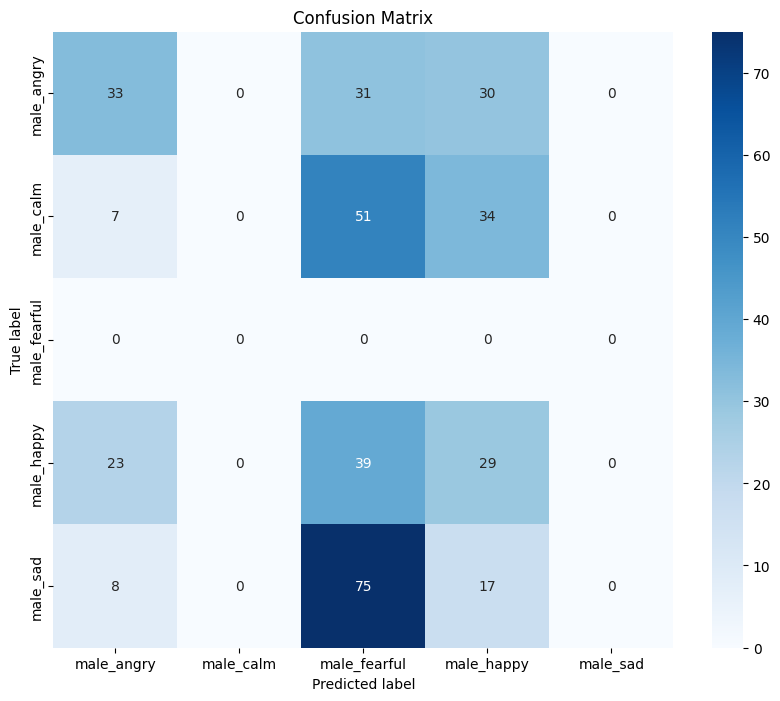

Classification Report:
              precision    recall  f1-score   support

  male_angry       0.46      0.35      0.40        94
   male_calm       0.00      0.00      0.00        92
male_fearful       0.00      0.00      0.00         0
  male_happy       0.26      0.32      0.29        91
    male_sad       0.00      0.00      0.00       100

    accuracy                           0.16       377
   macro avg       0.15      0.13      0.14       377
weighted avg       0.18      0.16      0.17       377



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
# inferência e coletar resultados
y_true, y_pred = infer_and_collect_results(df_emoUERJ, 'filename', 'emotion')
cm = confusion_matrix(y_true, y_pred, labels=model_classes)
plot_confusion_matrix(cm, classes=model_classes)
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=model_classes))